In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential,load_model
from keras.layers import Dense
from keras.utils import np_utils

In [3]:
data = pd.read_csv("MNIST.csv")
X = data.values
Y = X[:,0]
X = X[:,1:]/255.0
X = X.reshape(-1,28,28,1)
print(X.shape,Y.shape)

(42000, 28, 28, 1) (42000,)


In [4]:
encoder = load_model('./encoder.h5')
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 24, 24, 32)        18464     
_________________________________________________________________
average_pooling2d_9 (Average (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 10, 10, 16)        4624      
_________________________________________________________________
average_pooling2d_10 (Averag (None, 5, 5, 16)          0         
__________

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [5]:
x_train = encoder.predict(X)

In [8]:
y_train = np_utils.to_categorical(Y)

In [9]:
print(x_train.shape,y_train.shape)

(42000, 64) (42000, 10)


In [11]:
model = Sequential()

model.add(Dense(16,activation='relu',input_shape=(64,)))
model.add(Dense(10,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 1,210
Trainable params: 1,210
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
hist = model.fit(x_train,y_train,epochs = 100,shuffle=True,batch_size=512,validation_split=0.20)

Train on 33600 samples, validate on 8400 samples
Epoch 1/100
33600/33600 [==============================] - 0s 6us/step - loss: 0.3776 - acc: 0.8893 - val_loss: 0.3620 - val_acc: 0.8952
Epoch 2/100
33600/33600 [==============================] - 0s 5us/step - loss: 0.3722 - acc: 0.8914 - val_loss: 0.3562 - val_acc: 0.8971
Epoch 3/100
33600/33600 [==============================] - 0s 6us/step - loss: 0.3668 - acc: 0.8923 - val_loss: 0.3521 - val_acc: 0.8977
Epoch 4/100
33600/33600 [==============================] - 0s 6us/step - loss: 0.3628 - acc: 0.8925 - val_loss: 0.3480 - val_acc: 0.8979
Epoch 5/100
33600/33600 [==============================] - 0s 6us/step - loss: 0.3582 - acc: 0.8947 - val_loss: 0.3427 - val_acc: 0.9006
Epoch 6/100
33600/33600 [==============================] - 0s 7us/step - loss: 0.3538 - acc: 0.8954 - val_loss: 0.3386 - val_acc: 0.9005
Epoch 7/100
33600/33600 [==============================] - 0s 5us/step - loss: 0.3507 - acc: 0.8962 - val_loss: 0.3359 - val_acc:

33600/33600 [==============================] - 0s 6us/step - loss: 0.2826 - acc: 0.9157 - val_loss: 0.2750 - val_acc: 0.9151
Epoch 61/100
33600/33600 [==============================] - 0s 6us/step - loss: 0.2821 - acc: 0.9154 - val_loss: 0.2759 - val_acc: 0.9145
Epoch 62/100
33600/33600 [==============================] - 0s 6us/step - loss: 0.2813 - acc: 0.9162 - val_loss: 0.2757 - val_acc: 0.9170
Epoch 63/100
33600/33600 [==============================] - 0s 6us/step - loss: 0.2813 - acc: 0.9156 - val_loss: 0.2764 - val_acc: 0.9162
Epoch 64/100
33600/33600 [==============================] - 0s 6us/step - loss: 0.2801 - acc: 0.9157 - val_loss: 0.2745 - val_acc: 0.9164
Epoch 65/100
33600/33600 [==============================] - 0s 6us/step - loss: 0.2794 - acc: 0.9169 - val_loss: 0.2735 - val_acc: 0.9162
Epoch 66/100
33600/33600 [==============================] - 0s 6us/step - loss: 0.2789 - acc: 0.9156 - val_loss: 0.2728 - val_acc: 0.9181
Epoch 67/100
33600/33600 [=====================

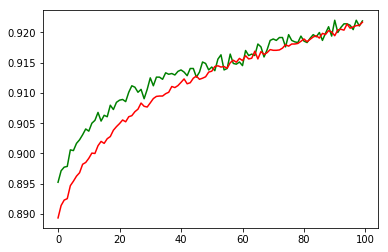

In [17]:
plt.figure(0)
plt.plot(hist.history['val_acc'],'g')
# plt.plot(hist.history['val_loss'],'b')
plt.plot(hist.history['acc'],'r')
# plt.plot(hist.history['loss'],'y')
plt.show()

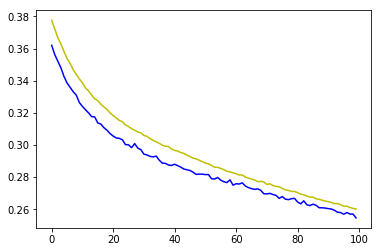

In [18]:
plt.figure(0)
# plt.plot(hist.history['val_acc'],'g')
plt.plot(hist.history['val_loss'],'b')
# plt.plot(hist.history['acc'],'r')
plt.plot(hist.history['loss'],'y')
plt.show()